In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

In [2]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [3]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [4]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [5]:
# load the mnist data training data CSV file into a list
data_file = open("mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [36]:
# train the neural network

# go through all records in the training data set
for record in data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [27]:
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [28]:
all_values = test_data_list[0].split(",")
print(all_values[0])

7


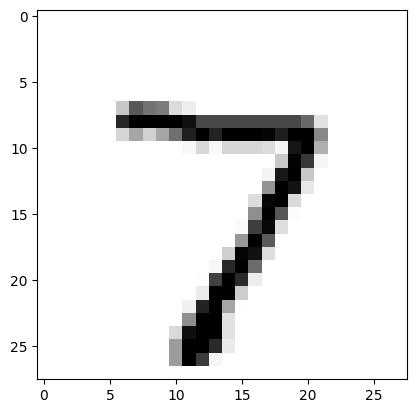

In [29]:
image_array = numpy.asarray(all_values[1:],dtype=float).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [30]:
n.query((numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01)

array([[0.01297885],
       [0.00594541],
       [0.05080849],
       [0.02442477],
       [0.00662066],
       [0.02545624],
       [0.00719227],
       [0.96256017],
       [0.03372747],
       [0.02224475]])

In [31]:
scorecard = []
for record in test_data_list:
    all_values = record.split(",")
    realAnswer = int(all_values[0])
    print("正确答案为:", realAnswer)
    image_array = numpy.asarray(all_values[1:],dtype=float).reshape((28,28))
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    answer = numpy.argmax(outputs)
    print("神经网络输出答案为:", answer)
    if answer == realAnswer:
        scorecard.append(1)
    else:
        scorecard.append(0)

print(scorecard)
print("正确率为:",scorecard.count(1)/len(scorecard))

正确答案为: 7
神经网络输出答案为: 7
正确答案为: 2
神经网络输出答案为: 2
正确答案为: 1
神经网络输出答案为: 1
正确答案为: 0
神经网络输出答案为: 0
正确答案为: 4
神经网络输出答案为: 4
正确答案为: 1
神经网络输出答案为: 1
正确答案为: 4
神经网络输出答案为: 9
正确答案为: 9
神经网络输出答案为: 4
正确答案为: 5
神经网络输出答案为: 1
正确答案为: 9
神经网络输出答案为: 9
[1, 1, 1, 1, 1, 1, 0, 0, 0, 1]
正确率为: 0.7


[[0.02031775]
 [0.0116613 ]
 [0.0030887 ]
 [0.02800674]
 [0.21284825]
 [0.06331665]
 [0.03833316]
 [0.0667466 ]
 [0.00722416]
 [0.00444918]] 4


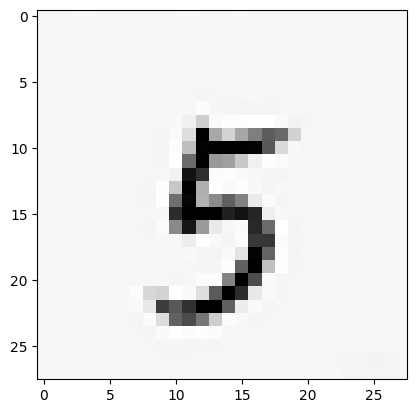

In [37]:
from PIL import Image

# 读取图像并转换为灰度图
img = Image.open('test1.jpg').convert('L')

# 调整图像大小为 28x28 像素（MNIST 标准尺寸）
img_resized = img.resize((28, 28), Image.LANCZOS)

# 转换为 numpy 数组
img_array = numpy.array(img_resized)
matplotlib.pyplot.imshow(255.0-img_array, cmap='Greys', interpolation='None')

img_data = 255.0 - img_array.reshape(784)
inputs = (img_data/255.0*0.99)+0.01
outputs = n.query(inputs)
answer = numpy.argmax(outputs)
print(outputs,answer)